## Comparison of 5 reconstruction algorithms for sparse coding

In [1]:
import matplotlib.pyplot as plt
from utils import *
import sys

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### 1. Loading the data

In [70]:
# Test beetween raw, processed and raw with clutter data
n_raw  = "data/raw.pkl"
n_proc = "data/preprocess.pkl"
n_clut = "data/raw_clutter.pkl"

# Images from paper:
n_proc_paper = "data/IRADAR__00H_05.pkl"
n_raw_paper =  "data/IRADAR__00H_05_RAW.pkl"

#Complete preprocessed image from the paper:
n_75cm_paper_full = "data/IRADAR_75cm.pkl"
n_0cm_paper_full = "data/IRADAR_0cm.pkl"

In [71]:
data = open_pkl(n_raw)
mask= data['mask']
ref = data['img'] 

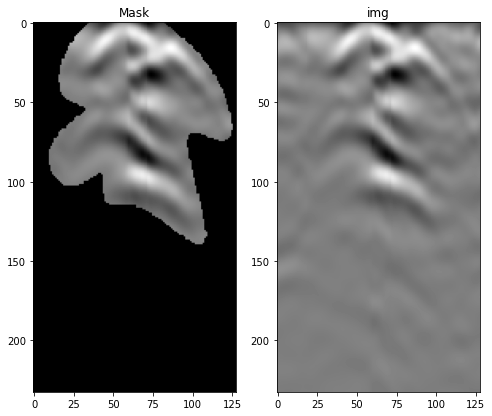

In [72]:
fig,ax = plt.subplots(1,2,figsize=(8,8))
ax[1].imshow(ref,cmap='gray',aspect='equal')
ax[1].set_title('img')
ax[0].imshow(mask*ref,cmap='gray',aspect='equal')
ax[0].set_title('Mask')
plt.show()

In [65]:
# Load dictionnary from paper:
dicop= param_load(ref.shape)
dicop=dicop["atoms"]

###  2. Estimation

In [21]:
signal_end2 = ref.copy
lambdaS = 0.4
rhoS = 500
rhoL = 200
nb_iter = 100

#Huber parameters
iter_max = 3
thresh=250
beta = 7.5E-4

In [25]:
# Add noise "gaussian" or "speckle":
signal_end2 = random_noise(ref,mode="gaussian",var=0)
print(metric_noise(ref,signal_end2))

/home/listic/miniconda3/envs/deep/lib/python3.10/site-packages/skimage/metrics/simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


{'PSNR': inf, 'MSE': 0.0, 'SSIM': 1.0}


#### Test time estimation and memory usage

In [11]:
def test_huber(dicop,lambdaS,nb_iter,rhoS,rhoL,thresh,beta):
    huber_class = ADMMSourceSepHUB(dicop[:,:,:],lambdaS,nb_iter,1E-8,rhoS,rhoL,update_rho="fix",threshold_H=thresh,alpha=beta)
    huber_class.fit(signal_end2)

def test_l2(dicop,lambdaS,nb_iter,rhoS,rhoL):
    L2_SS_class = ADMMSourceSep(dicop[:,:,:],lambdaS,nb_iter,1E-8,rhoS,rhoL,update_rho="fix")
    L2_SS_class.fit(signal_end2);

%timeit test_huber(dicop,lambdaS,nb_iter,rhoS,rhoL,thresh,beta)
%timeit test_l2(dicop,lambdaS,nb_iter,rhoS,rhoL)

rec : 53.6  ||duaS :  1.6 ||duaM :  52.4 ||priC :  0.001438 ||priL :  1.505e-05: 100%|██████████| 100/100 [00:23<00:00,  4.18it/s] 
rec : 53.6  ||duaS :  1.6 ||duaM :  52.4 ||priC :  0.001438 ||priL :  1.505e-05: 100%|██████████| 100/100 [00:31<00:00,  3.22it/s] 
rec : 53.6  ||duaS :  1.6 ||duaM :  52.4 ||priC :  0.001438 ||priL :  1.505e-05: 100%|██████████| 100/100 [00:29<00:00,  3.44it/s] 
rec : 53.6  ||duaS :  1.6 ||duaM :  52.4 ||priC :  0.001438 ||priL :  1.505e-05: 100%|██████████| 100/100 [00:27<00:00,  3.57it/s] 
rec : 53.6  ||duaS :  1.6 ||duaM :  52.4 ||priC :  0.001438 ||priL :  1.505e-05: 100%|██████████| 100/100 [00:26<00:00,  3.72it/s] 
rec : 53.6  ||duaS :  1.6 ||duaM :  52.4 ||priC :  0.001438 ||priL :  1.505e-05: 100%|██████████| 100/100 [00:26<00:00,  3.72it/s] 
rec : 53.6  ||duaS :  1.6 ||duaM :  52.4 ||priC :  0.001438 ||priL :  1.505e-05: 100%|██████████| 100/100 [00:27<00:00,  3.62it/s] 
rec : 53.6  ||duaS :  1.6 ||duaM :  52.4 ||priC :  0.001438 ||priL :  1.505e

28.1 s ± 1.39 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


rec : 0.0005663  ||duaS :  0.881 ||duaL :  1.4 ||pri :  0.00728 ||rhoS :  5e+02 ||rhoL :  2e+02: 100%|██████████| 100/100 [00:26<00:00,  3.72it/s] 
rec : 0.0005663  ||duaS :  0.881 ||duaL :  1.4 ||pri :  0.00728 ||rhoS :  5e+02 ||rhoL :  2e+02: 100%|██████████| 100/100 [00:26<00:00,  3.81it/s] 
rec : 0.0005663  ||duaS :  0.881 ||duaL :  1.4 ||pri :  0.00728 ||rhoS :  5e+02 ||rhoL :  2e+02: 100%|██████████| 100/100 [00:26<00:00,  3.80it/s] 
rec : 0.0005663  ||duaS :  0.881 ||duaL :  1.4 ||pri :  0.00728 ||rhoS :  5e+02 ||rhoL :  2e+02: 100%|██████████| 100/100 [00:25<00:00,  3.91it/s] 
rec : 0.0005663  ||duaS :  0.881 ||duaL :  1.4 ||pri :  0.00728 ||rhoS :  5e+02 ||rhoL :  2e+02: 100%|██████████| 100/100 [00:24<00:00,  4.12it/s] 
rec : 0.0005663  ||duaS :  0.881 ||duaL :  1.4 ||pri :  0.00728 ||rhoS :  5e+02 ||rhoL :  2e+02: 100%|██████████| 100/100 [00:23<00:00,  4.30it/s] 
rec : 0.0005663  ||duaS :  0.881 ||duaL :  1.4 ||pri :  0.00728 ||rhoS :  5e+02 ||rhoL :  2e+02: 100%|██████████

24.8 s ± 1.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
print("Original image shape:",ref.shape," Size:",sys.getsizeof(ref)/2**10,"KB")
print("Dictionnary shape: ",dicop.shape," Size:",sys.getsizeof(dicop)/2**20,"MB")
resolution = np.finfo(np.float64()).resolution
sparsity = 100*np.sum((np.abs(dicop)<resolution))/np.size(dicop)
print(f"Sparsity of the dictionnary: {sparsity:.2f}%")

Original image shape: (550, 4536)  Size: 0.1171875 KB
Dictionnary shape:  (550, 4536, 25)  Size: 475.84546661376953 MB
Sparsity of the dictionnary: 99.68%


#### Huber estimation

In [230]:
t = time.time()
huber_class = ADMMSourceSepHUB(dicop[:,:,:],lambdaS,nb_iter,1E-8,rhoS,rhoL,update_rho="fix",
                   threshold_H=thresh,alpha=beta)
huber_class.fit(signal_end2);
nhelps = time.time()-t

resultat_huber = ((huber_class.dal_).real).reshape(ref.shape)
res_H = scale_0_1(resultat_huber)
LH = scale_0_1(((huber_class.L_).real).reshape(ref.shape))

rec : 75.42  ||duaS :  4.22 ||duaM :  74.3 ||priC :  0.002829 ||priL :  6.347e-05: 100%|██████████| 30/30 [00:08<00:00,  3.72it/s]


Norme H : (8.09202766418457s)


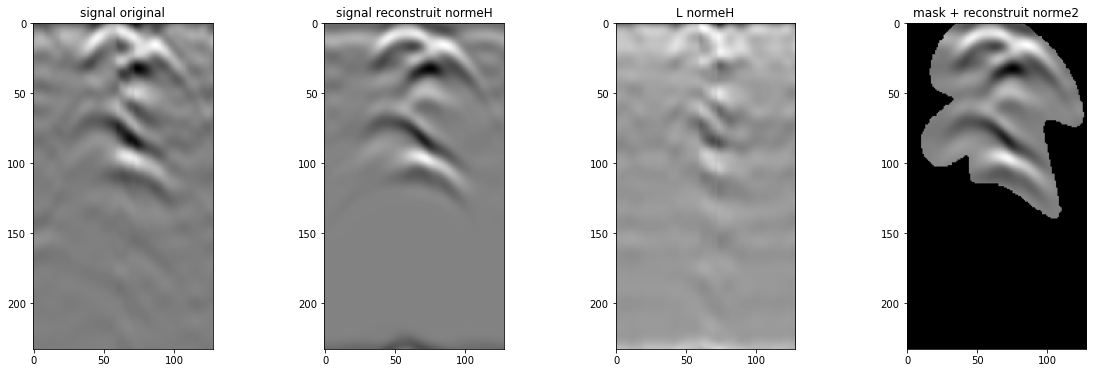

In [231]:
print(f"Norme H : ({nhelps}s)")
fig,ax = plt.subplots(1,4,figsize=(20,6))
ax[0].imshow(ref,cmap='gray',aspect='equal')
ax[0].set_title('signal original')
ax[1].imshow(res_H,cmap='gray',aspect='equal')
ax[1].set_title('signal reconstruit normeH')
ax[2].imshow(LH,cmap='gray',aspect='equal')
ax[2].set_title('L normeH')
ax[3].imshow(mask*res_H,cmap='gray',aspect='equal')
ax[3].set_title('mask + reconstruit norme2')
plt.show()

#### Source separation (L2 + low rank)

In [238]:
t = time.time()
L2_SS_class = ADMMSourceSep(dicop[:,:,:],lambdaS,nb_iter,1E-8,rhoS,rhoL,update_rho="fix")
L2_SS_class.fit(signal_end2);
n2elps = time.time()-t

resultat_L2SS = ((L2_SS_class.dal_).real).reshape(ref.shape)
res_l2ss = scale_0_1(resultat_L2SS)
L2 = scale_0_1(((L2_SS_class.L_).real).reshape(ref.shape))

rec : 0.4493  ||duaS :  0.876 ||duaL :  0.0872 ||pri :  0.5395 ||rhoS :  7.81 ||rhoL :  0.195: 100%|██████████| 30/30 [00:09<00:00,  3.15it/s]   


Norme 2 + L : (9.555653810501099s)


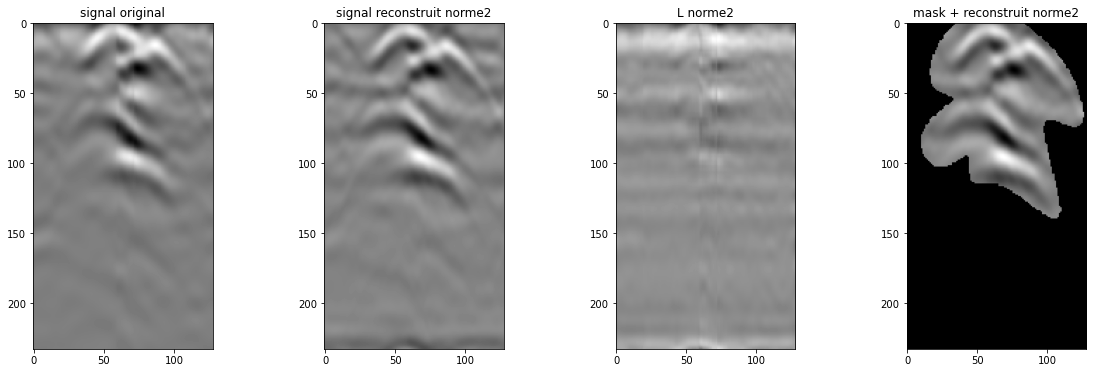

In [239]:
print(f"Norme 2 + L : ({n2elps}s)")
fig,ax = plt.subplots(1,4,figsize=(20,6))
ax[0].imshow(ref,cmap='gray',aspect='equal')
ax[0].set_title('signal original')
ax[1].imshow(res_l2ss,cmap='gray',aspect='equal')
ax[1].set_title('signal reconstruit norme2')
ax[2].imshow(L2,cmap='gray',aspect='equal')
ax[2].set_title('L norme2')
ax[3].imshow(mask*res_l2ss,cmap='gray',aspect='equal')
ax[3].set_title('mask + reconstruit norme2')
plt.show()

#### Sparse coding (L2)

In [234]:
t = time.time()
L2_class = ADMMSparseCoding(dicop[:,:,:],lambdaS,nb_iter,1E-8,rhoS,update_rho="fix")
L2_class.fit(signal_end2);
n1elps = time.time()-t

resultat_L2 = ((L2_class.dal_).real).reshape(ref.shape)
res_l2 = scale_0_1(resultat_L2)

rec : 86.812  ||dua :  5.0881 ||pri :  0.0021482 ||rho :  500.0: 100%|██████████| 30/30 [00:04<00:00,  6.88it/s]


Norme 2 : (8.340569734573364s)


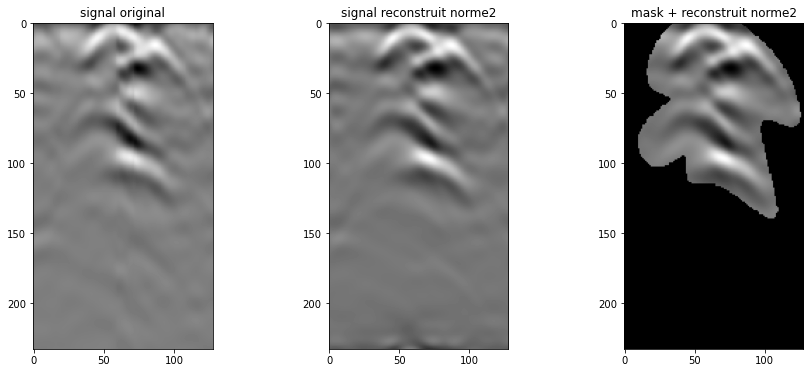

In [235]:
print(f"Norme 2 : ({n2elps}s)")
fig,ax = plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(ref,cmap='gray',aspect='equal')
ax[0].set_title('signal original')
ax[1].imshow(res_l2,cmap='gray',aspect='equal')
ax[1].set_title('signal reconstruit norme2')
ax[2].imshow(mask*res_l2,cmap='gray',aspect='equal')
ax[2].set_title('mask + reconstruit norme2')
plt.show()

#### Sparse coding SVD (SVD + L2)

In [236]:
t = time.time()
SVD_L2_class = ADMMSparseCoding(dicop[:,:,:],lambdaS,nb_iter,1E-8,rhoS,update_rho="fix")
signal_SVD = SVD_gpr(signal_end2,1)
SVD_L2_class.fit(signal_SVD);
n1elps = time.time()-t

resultat_SVDL2 = ((SVD_L2_class.dal_).real).reshape(ref.shape)
res_svd_l2 = scale_0_1(resultat_SVDL2)

rec : 94.958  ||dua :  5.6309 ||pri :  0.0022688 ||rho :  500.0: 100%|██████████| 30/30 [00:04<00:00,  7.31it/s]


SVD + Norme 2 : (8.340569734573364s)


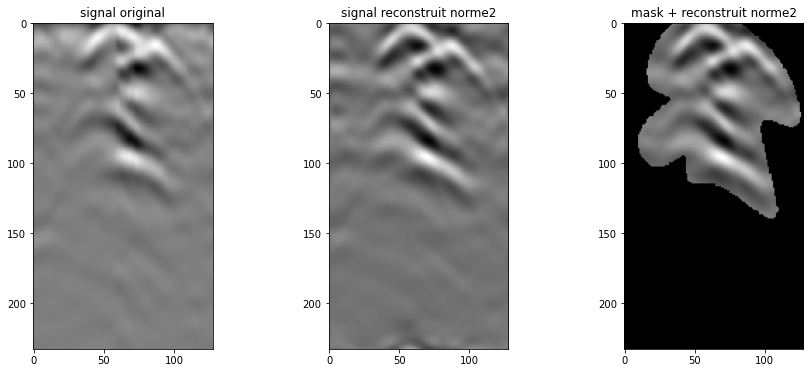

In [237]:
print(f"SVD + Norme 2 : ({n2elps}s)")
fig,ax = plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(ref,cmap='gray',aspect='equal')
ax[0].set_title('signal original')
ax[1].imshow(res_svd_l2,cmap='gray',aspect='equal')
ax[1].set_title('signal reconstruit norme2')
ax[2].imshow(mask*res_svd_l2,cmap='gray',aspect='equal')
ax[2].set_title('mask + reconstruit norme2')
plt.show()

#### SVD

In [ ]:
print(f"SVD: ")
fig,ax = plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(ref,cmap='gray',aspect='equal')
ax[0].set_title('signal original')
ax[1].imshow(signal_SVD,cmap='gray',aspect='equal')
ax[1].set_title('signal reconstruit norme2')
ax[2].imshow(mask*signal_SVD,cmap='gray',aspect='equal')
ax[2].set_title('mask + reconstruit norme2')
plt.show()

#### ROC curve analysis

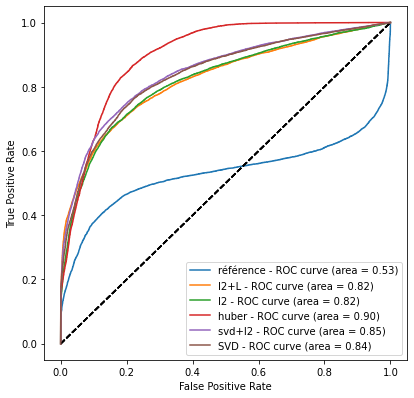

In [240]:
roc_curve_plot(mask,[ref,resultat_huber,resultat_L2SS,resultat_SVDL2,resultat_L2,signal_SVD],
                    ["référence",'huber','l2_SS',"svd+l2","l2","svd"])